In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit
from math import pow

In [117]:
#functions for biochemical equations
def single_cell(x,t): 
    AHL=x[0]
    LuxR=x[1]
    Mon=x[2]
    Dim=x[3]
    mng=x[4]
    
    dAHLdt= small+k_min_one*Mon-k1*AHL*LuxR -(d_AHL+mi)*AHL
    dLuxRdt=small+ ((kluxr*pcon*CN)/(d_mrnaluxr+mi)) - (d_luxr+mi)*LuxR + k_min_one*Mon - k1*LuxR*AHL
    dMondt= small+ (k1*LuxR*AHL+2*k_min_two*Dim-k_min_one*Mon-2*k2*(Mon**2)-(d_mon+mi)*Mon)
    dDimdt= small+ (k2*(Mon**2)-k_min_two*Dim-(d_dim+mi)*Dim)
    dmngdt =small+ ((kmng*plux*CN)/(d_mrnamng+mi))*(b_plux+(1-b_plux)*((pow(abs(Dim),n))/((pow(abs(Dim),n))+(pow(kdlux*CN,n))))) - (d_mng+mi)*mng
    
    return [dAHLdt,dLuxRdt,dMondt,dDimdt,dmngdt]

def whole_cell(x,t):
    N=x[0]
    AHL_ext=x[1]
    AHL=x[2]
    LuxR=x[3]
    Mon=x[4]
    Dim=x[5]
    mng=x[6]
    
    dNdt=small+mi*N*(1-(N/Nmax))
    dAHL_extdt=small+D*N*(AHL-Vc*AHL_ext)-(d_AHL+mi)*AHL_ext
    dAHLdt=small+k_min_one*Mon-k1*AHL*LuxR -(d_AHL+mi)*AHL +D*(Vc*AHL_ext-AHL)
    dLuxRdt=small+ ((kluxr*pcon*CN)/(d_mrnaluxr+mi)) - (d_luxr+mi)*LuxR + k_min_one*Mon - k1*LuxR*AHL
    dMondt=small+ (k1*LuxR*AHL+2*k_min_two*Dim-k_min_one*Mon-2*k2*(Mon**2)-(d_mon+mi)*Mon)
    dDimdt=small+ (k2*(Mon**2)-k_min_two*Dim-(d_dim+mi)*Dim)
    dmngdt =small+ ((kmng*plux*CN)/(d_mrnamng+mi))*(b_plux+(1-b_plux)*((pow(abs(Dim),n))/((pow(abs(Dim),n))+(pow(kdlux*CN,n))))) - (d_mng+mi)*mng
    
    return [dNdt,dAHL_extdt,dAHLdt,dLuxRdt,dMondt,dDimdt,dmngdt]

def molecules(number): #turns nM to molecules
    return number*NA*10**(-18)

def molar(number): #turns molecules to nM
    return(number*10**(18))/NA

In [118]:
CN=17 #medium copy number
mi= 0.015
NA=6.2*10**(23)
kmng=(14*10**(-3))*60 #RBS34
kluxr=(27*10**(-3))*60 #1.62
k_min_one=10
k_min_two=1
k1=k_min_one/kd1
k2=k_min_two/kd2
d_mrnamng=0.039 
d_mng=0.01
d_mrnaluxr=0.347 #0.362
d_mon=0.156
d_dim=0.017
d_luxr=0.002
d_AHL=0.01
D=10
Vecoli=10**(-9)
Vbead=200*10**(-6)
Vc=Vecoli/Vbead
Nmax=250
n=2
b_plux=0.05 #percentage of leakage
plux=0.79 #promoters
pcon=(58.5*10**(-3))*60 #3.51
small=1e-1
t=np.linspace(0, 360) 


5753.8563343638025


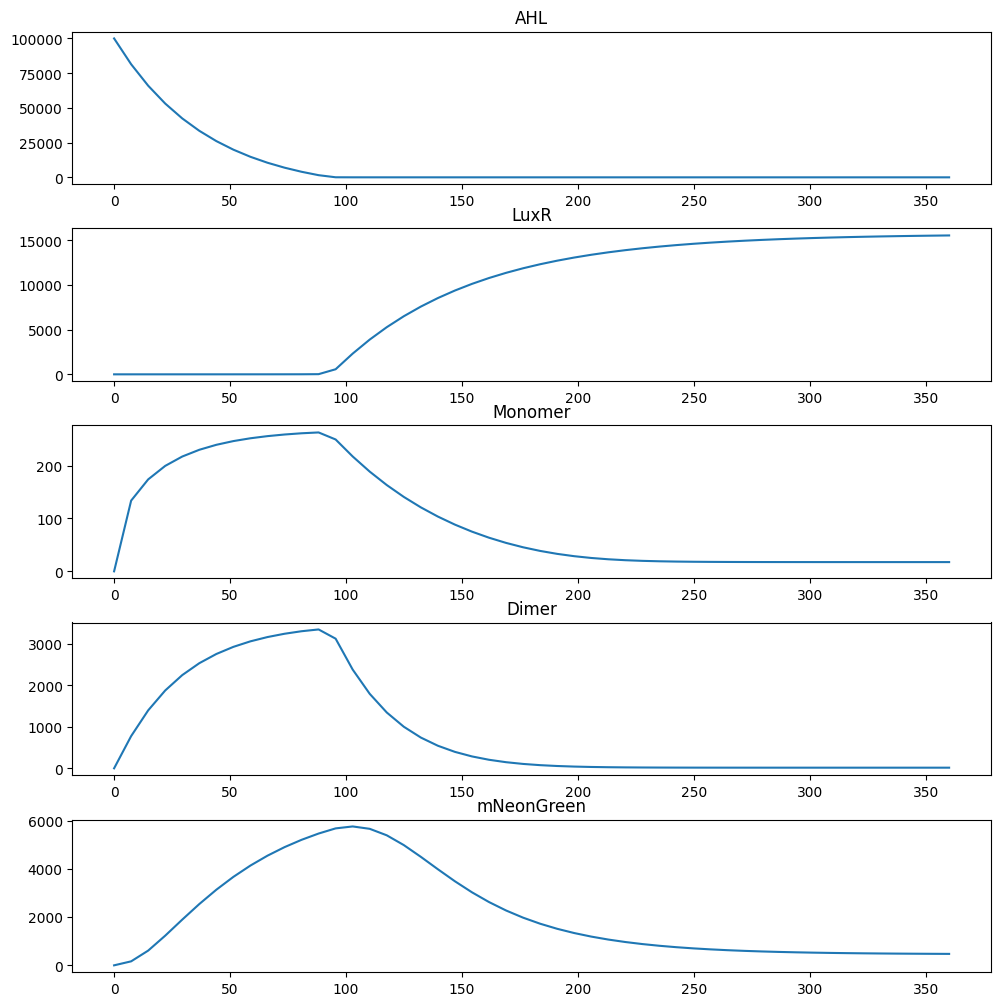

In [119]:
#single-cell time-values (with AHL in molecules)
small=1
n=2
kd1=100
kd2=20
kdlux=100
kdlux_eff=kdlux*CN
k1=k_min_one/kd1
k2=k_min_two/kd2
x0=[10**(5),0,0,0,0] #AHL-LuxR-Mon-Dim-mng
solution=odeint(single_cell,x0,t)
fig,axs=plt.subplots(5,figsize=(10,10))
fig.tight_layout()
axs[0].plot(t,solution[:,0])
axs[0].set_title('AHL')
axs[1].plot(t,solution[:,1])
axs[1].set_title('LuxR')
axs[2].plot(t,solution[:,2])
axs[2].set_title('Monomer')
axs[3].plot(t,solution[:,3])
axs[3].set_title('Dimer')
axs[4].plot(t,solution[:,4])
axs[4].set_title('mNeonGreen')
print(max(solution[:,4]))

5766.009594268805


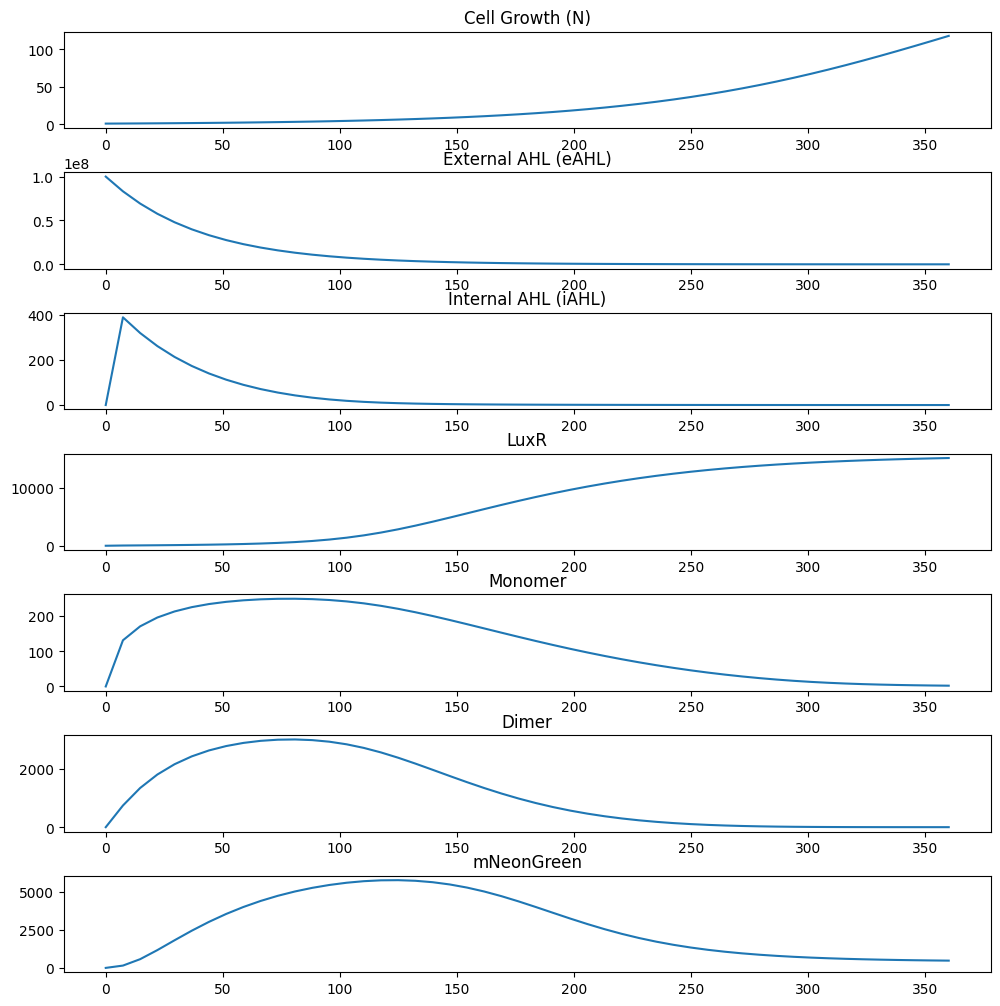

In [120]:
#whole-cell time-values (with AHL in molecules)
small=0
kd1=100
kd2=20
kdlux=100
kdlux_eff=kdlux*CN
k1=k_min_one/kd1
k2=k_min_two/kd2
x0=[1,10**(8),0,0,0,0,0] #N-AHL_ext-AHL_int-LuxR-Mon-Dim-mng
solution=odeint(whole_cell,x0,t)
fig,axs=plt.subplots(7,figsize=(10,10))
fig.tight_layout()
axs[0].plot(t,solution[:,0])
axs[0].set_title('Cell Growth (N)')
axs[1].plot(t,solution[:,1])
axs[1].set_title('External AHL (eAHL)')
axs[2].plot(t,solution[:,2])
axs[2].set_title('Internal AHL (iAHL)')
axs[3].plot(t,solution[:,3])
axs[3].set_title('LuxR')
axs[4].plot(t,solution[:,4])
axs[4].set_title('Monomer')
axs[5].plot(t,solution[:,5])
axs[5].set_title('Dimer')
axs[6].plot(t,solution[:,6])
axs[6].set_title('mNeonGreen')
print(max(solution[:,6]))

C:\Users\manos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Text(0.5, 1.0, 'TF Single Cell (OpLo)')

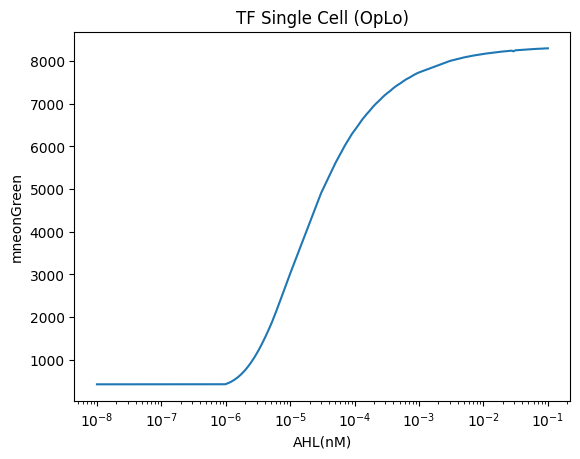

In [121]:
#Single-cell TF (with AHL in nM)
mng_temp=[]
small=1e-45
n=1.5
kd1=100*10**(-9)
kd2=20*10**(-9)
kdlux=100*10**(-9)
kdlux_eff=kdlux*CN
k1=k_min_one/kd1
k2=k_min_two/kd2
AHL_values_0=np.linspace(10**(-8),10**(-6))
AHL_values_1=np.linspace(10**(-6),10**(-5))
AHL_values_2=np.linspace(10**(-5),10**(-3))
AHL_values_3=np.linspace(10**(-3),10**(-1))
AHL_values=np.concatenate([AHL_values_0,AHL_values_1,AHL_values_2,AHL_values_3])
for i in range(np.shape(AHL_values)[0]):
    x0=[AHL_values[i],0,0,0,0]
    solution=odeint(single_cell,x0,t)
    mng_temp.append(max(solution[:,4]))
plt.semilogx(AHL_values,mng_temp)
plt.xlabel('AHL(nM)')
plt.ylabel('mneonGreen')
plt.title('TF Single Cell (OpLo)')

Text(0.5, 1.0, 'TF Whole Cell (OpLo)')

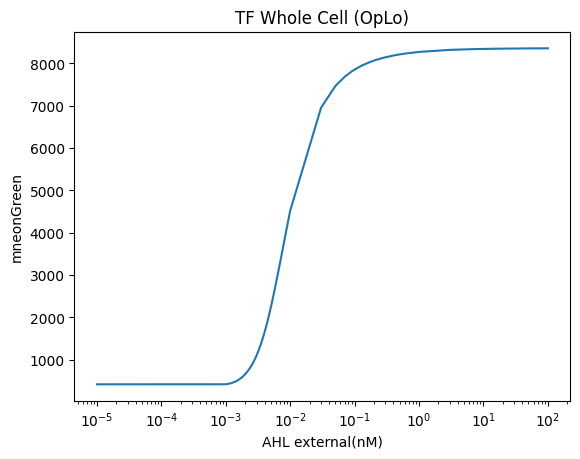

In [122]:
#TF for whole-cell model

mng_temp=[]
small=1e-45
n=2
kd1=100*10**(-9)
kd2=20*10**(-9)
kdlux=100*10**(-9)
kdlux_eff=kdlux*CN
k1=k_min_one/kd1
k2=k_min_two/kd2
AHL_values_0=np.linspace(10**(-5),10**(-3))
AHL_values_1=np.linspace(10**(-3),10**(-2))
AHL_values_2=np.linspace(10**(-2),10**(0))
AHL_values_3=np.linspace(10**(0),10**(2))
AHL_values=np.concatenate([AHL_values_0,AHL_values_1,AHL_values_2,AHL_values_3])
for i in range(np.shape(AHL_values)[0]):
    x0=[1,AHL_values[i],0,0,0,0,0]
    solution=odeint(whole_cell,x0,t)
    mng_temp.append(max(solution[:,6]))
plt.semilogx(AHL_values,mng_temp)
plt.xlabel('AHL external(nM)')
plt.ylabel('mneonGreen')
plt.title('TF Whole Cell (OpLo)')

In [123]:
#model_fit_functions
def f(y,t,paras):
    N=y[0]
    AHL_ext=y[1]
    AHL=y[2]
    LuxR=y[3]
    Mon=y[4]
    Dim=y[5]
    mng=y[6]
    
    
    try:
        mi = paras['mi'].value
        a_luxr = paras['a_luxr'].value
        b_plux=paras['b_plux'].value
        a_mng = paras['a_mng'].value
        kdlux=paras['kdlux'].value
        n = paras['n'].value

    except KeyError:
        mi,a_luxr_b_plux,a_mng,n = paras
    
    dNdt=small+mi*N*(1-(N/Nmax))
    dAHL_extdt=small+D*N*(AHL-Vc*AHL_ext)-(d_AHL+mi)*AHL_ext
    dAHLdt=small+k_min_one*Mon-k1*AHL*LuxR -(d_AHL+mi)*AHL +D*(Vc*AHL_ext-AHL)
    dLuxRdt=small+ ((kluxr*pcon*CN)/(d_mrnaluxr+mi)) - (d_luxr+mi)*LuxR + k_min_one*Mon - k1*LuxR*AHL
    dMondt=small+ (k1*LuxR*AHL+2*k_min_two*Dim-k_min_one*Mon-2*k2*(Mon**2)-(d_mon+mi)*Mon)
    dDimdt=small+ (k2*(Mon**2)-k_min_two*Dim-(d_dim+mi)*Dim)
    dmngdt =small+ ((kmng*plux*CN)/(d_mrnamng+mi))*(b_plux+(1-b_plux)*((pow(abs(Dim),n))/((pow(abs(Dim),n))+(pow(kdlux*CN,n))))) - (d_mng+mi)*mng
    
    return [dNdt,dAHL_extdt,dAHLdt,dLuxRdt,dMondt,dDimdt,dmngdt]

def g(t, x0, paras):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f, x0, t, args=(paras,))
    return x

def residual(paras, t, data):
    mng_model=[]
    for i in range(len(x0_measured)):
        x0=[1,x0_measured[i],0,0,0,0,0]
        model = g(t, x0, paras)
        mng_model.append(max(model[:,6]))
    mng_model=np.array(mng_model)
    data=np.array(data)
    #print(mng_model)
    print(paras['d_mng'])
    print( paras['mi'].value,paras['b_plux'].value,paras['a_luxr'].value,paras['a_mng'].value,paras['kdlux'].value,paras['n'].value)
    print(np.mean((mng_model-data).ravel()))
    return (mng_model-data).ravel()



[417.7706637827422, 417.77071469261847, 417.77118249444, 417.774629245005, 417.7990970276426, 519.4530143996957, 1164.5870157214947, 2927.129750545307, 5197.786279420044, 6697.205314705078, 7461.629726888332, 7851.882920061728]


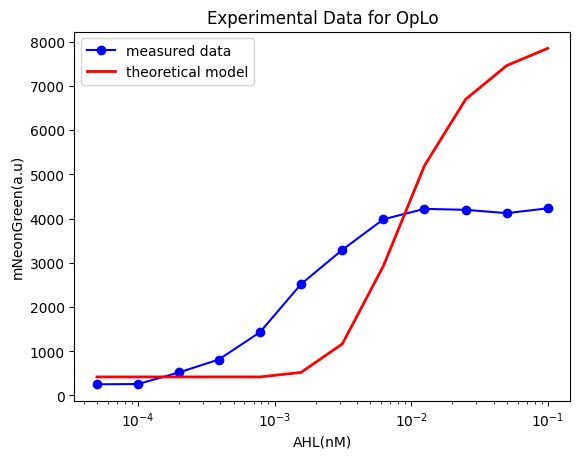

In [124]:
t_measured=[0,20,40,60,80,100,120,150,180,240,300,360]
x6_measured=[250.5,257,521,812,1428,2518,3293,3984,4220,4198,4123,4232]
x0_measured=[0.00005,0.0001,0.0002,0.00039,0.00078,0.00156,0.00313,0.00625,0.0125,0.025,0.05,0.1]
small=1e-45

plt.figure()
plt.semilogx(x0_measured, x6_measured, marker='o', color='b', label='measured data')
plt.xlabel('AHL(nM)')
plt.ylabel('mNeonGreen(a.u)')
plt.title('Experimental Data for OpLo')

params=Parameters()
params.add('mi', value=0.015, min=0, max=1)
params.add('b_plux',value=0.05, min=0,max=1)
params.add('a_luxr', value=1.27, min=0, max=100)
params.add('a_mng', value=0.66, min=0, max=100)
params.add('kdlux', value=100*10**(-9), min=10**(-9), max=1)
params.add('n', value=2, min=0.5, max=4)
params.add('d_mng',value=0.01,min=0,max=1)

AHL_values_0=np.linspace(10**(-5),10**(-3))
AHL_values_1=np.linspace(10**(-3),10**(-2))
AHL_values_2=np.linspace(10**(-2),10**(0))
AHL_values_3=np.linspace(10**(0),10**(2))
AHL_values=np.concatenate([AHL_values_0,AHL_values_1,AHL_values_2,AHL_values_3])

mng_fit=[]

for i in range(len(x0_measured)):
    y0=[1,x0_measured[i],0,0,0,0,0]
    model_fit=g(np.linspace(0,360,100),y0,params)
    mng_fit.append(max(model_fit[:,6]))

print(mng_fit)
plt.semilogx(x0_measured, mng_fit,linewidth=2,color='red',label='theoretical model')
plt.legend()
plt.show()

In [125]:
result = minimize(residual, params, args=(t_measured, x6_measured),method='Nelder-Mead', tol=1e-6) #doesnt stop
print(result.params)

<Parameter 'd_mng', value=0.010000000000000009, bounds=[0:1]>
0.015000000000000013 0.04999999999999999 1.269999999999999 0.6599999999999995 9.999999998766865e-08 2.0
328.0952957091816
<Parameter 'd_mng', value=0.010000000000000009, bounds=[0:1]>
0.008015968420429731 0.04999999999999999 1.269999999999999 0.6599999999999995 9.999999998766865e-08 2.0
2303.6208348752334
<Parameter 'd_mng', value=0.010000000000000009, bounds=[0:1]>
0.015000000000000013 0.03850909416983789 1.269999999999999 0.6599999999999995 9.999999998766865e-08 2.0
268.9801740146875
<Parameter 'd_mng', value=0.010000000000000009, bounds=[0:1]>
0.015000000000000013 0.04999999999999999 0.6277054817458494 0.6599999999999995 9.999999998766865e-08 2.0
328.0952957091816
<Parameter 'd_mng', value=0.010000000000000009, bounds=[0:1]>
0.015000000000000013 0.04999999999999999 1.269999999999999 0.21261553633604713 9.999999998766865e-08 2.0
328.0952957091816


C:\Users\manos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


<Parameter 'd_mng', value=0.010000000000000009, bounds=[0:1]>
0.015000000000000013 0.04999999999999999 1.269999999999999 0.6599999999999995 0.0015155220373490768 2.0
2128.7789408471585
<Parameter 'd_mng', value=0.010000000000000009, bounds=[0:1]>
0.015000000000000013 0.04999999999999999 1.269999999999999 0.6599999999999995 9.999999998766865e-08 1.987592264051686
327.0841884884125
<Parameter 'd_mng', value=0.004337300281624545, bounds=[0:1]>
0.015000000000000013 0.04999999999999999 1.269999999999999 0.6599999999999995 9.999999998766865e-08 2.0
328.0952957091816
<Parameter 'd_mng', value=0.008146041161333273, bounds=[0:1]>
0.012785835490653152 0.04657132221768989 1.0638641869364862 0.507108828066688 0.0015648754521816043 1.9964535942118715
1085.1724685787747
<Parameter 'd_mng', value=0.008591883545847945, bounds=[0:1]>
0.01332303592735129 0.04741764785167435 1.113707481858528 0.5434563440190499 0.0003976209103352183 1.9973400965585908
-2043.185829834529
<Parameter 'd_mng', value=0.007773

KeyboardInterrupt: 

Parameters([('mi', <Parameter 'mi', value=0.028, bounds=[0:1]>), ('b_plux', <Parameter 'b_plux', value=0.04, bounds=[0:1]>), ('a_luxr', <Parameter 'a_luxr', value=1.47, bounds=[0:100]>), ('a_mng', <Parameter 'a_mng', value=0.96, bounds=[0:100]>), ('kdlux', <Parameter 'kdlux', value=6.14e-09, bounds=[1e-09:1]>), ('n', <Parameter 'n', value=1.5, bounds=[0.5:4]>), ('d_mng', <Parameter 'd_mng', value=0.007, bounds=[0:1]>)])


C:\Users\manos\AppData\Local\Temp\ipykernel_9136\2341280396.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g^" (-> marker='^'). The keyword argument will take precedence.
  plt.semilogx(x0_measured, x6_measured,'g^', marker='o', color='b', label='measured data')
C:\Users\manos\AppData\Local\Temp\ipykernel_9136\2341280396.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g^" (-> color='g'). The keyword argument will take precedence.
  plt.semilogx(x0_measured, x6_measured,'g^', marker='o', color='b', label='measured data')


[177.2378180378485, 177.2378195845168, 177.23781845352485, 177.2378188646447, 177.23781939457163, 177.23782007847228, 177.2378194895436, 177.23782170689142, 177.23782278039042, 177.23782393667022, 177.2378251618021, 177.23782684631428, 177.23782850371634, 177.23783509527942, 177.23783229824457, 177.23783445242944, 177.23783676710644, 177.23783946413323, 177.23784216353062, 177.23784523520789, 177.23785132569873, 177.2378517544723, 177.23785540463106, 177.23785932776136, 177.23786344701972, 177.2378686504582, 177.23787197169742, 177.23787681594814, 177.23788166687117, 177.2378867742134, 177.23791586076675, 177.23789823932142, 177.23790423829254, 177.23791031226804, 177.23791715990308, 177.2379239411709, 177.237931018858, 177.23793853565485, 177.23794510374165, 177.23795769533143, 177.23796176359556, 177.23797009936615, 177.23797793252595, 177.2379870628014, 177.23799573635716, 177.23800580999932, 177.23801519275816, 177.35945139681306, 177.8319059387702, 178.48699738901885, 178.48699738

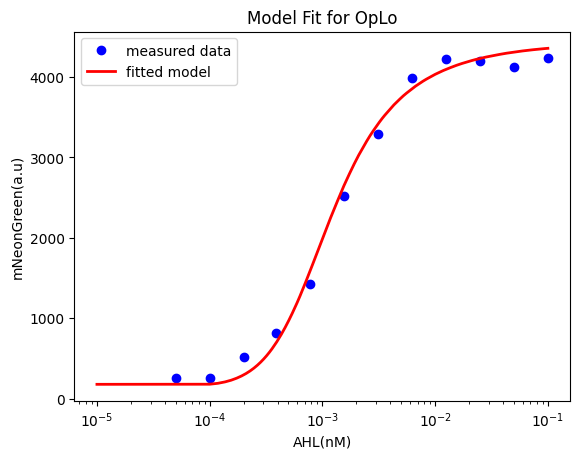

In [127]:

params['mi'].value=0.028
params['b_plux'].value=0.040
params['a_luxr'].value=1.47
params['a_mng'].value=0.96
params['kdlux'].value=6.14*10**(-9)
params['n'].value=1.5
params['d_mng'].value=0.007



print(params)
plt.figure()
plt.semilogx(x0_measured, x6_measured,'g^', marker='o', color='b', label='measured data')
plt.xlabel('AHL(nM)')
plt.ylabel('mNeonGreen(a.u)')
plt.title('Model Fit for OpLo')

AHL_values_0=np.linspace(10**(-5),10**(-4))
AHL_values_1=np.linspace(10**(-4),10**(-3))
AHL_values_2=np.linspace(10**(-3),10**(-2))
AHL_values_3=np.linspace(10**(-2),10**(-1))
AHL_values=np.concatenate([AHL_values_0,AHL_values_1,AHL_values_2,AHL_values_3])

mng_fit=[]

for i in range(200):
    y0=[1,AHL_values[i],0,0,0,0,0]
    model_fit=g(np.linspace(0,360,100),y0,params)
    mng_fit.append(max(model_fit[:,6]))

print(mng_fit)
plt.semilogx(AHL_values, mng_fit,linewidth=2,color='red',label='fitted model')
plt.legend()
plt.show()
